In [5]:
import pandas as pd
import mca
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy

import sys
sys.path.append("..")

In [7]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_8_24_23.csv", index_col=0)


In [8]:
df.fillna(0, inplace=True)

In [9]:
df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [10]:
reducer = umap.UMAP()
reducer.fit(df)

df.shape

(6035, 165)

In [ ]:
mca_ben = mca.MCA(df, ncols=None)
mca_ind = mca.MCA(df, ncols=None, benzecri=False)

print(mca.MCA.__doc__)

Run MCA on selected columns of a pd DataFrame.
	
	If the column are specified, assume that they hold
	categorical variables that need to be replaced with
	dummy indicators, otherwise process the DataFrame as is.

	'cols': The columns of the DataFrame to process.
	'ncols': The number of columns before dummy coding. To be passed if cols isn't.
	'benzecri': Perform Benzécri correction (default: True)
	'TOL': value below which to round eigenvalues to zero (default: 1e-4)
	


In [16]:
vars(mca_ind)

{'K': 165,
 'J': 165,
 'r': 3        0.000077
 5        0.000166
 6        0.000118
 8        0.000214
 9        0.000188
            ...   
 14158    0.000199
 14161    0.000129
 14163    0.000236
 14166    0.000081
 14168    0.000133
 Length: 6035, dtype: float64,
 'c': Symptom_Memory_short                  0.015254
 Symptom_Memory_long                   0.009247
 Symptom_Memory_no_new_memories        0.001948
 Symptom_Memory_forget_tasks           0.003070
 Symptom_Memory_other                  0.002675
                                         ...   
 Symptom_SkinAllergy_other_itchy       0.001277
 Symptom_SkinAllergy_shingles          0.000572
 Symptom_PEM                           0.019678
 Symptom_Fatigue                       0.021810
 Symptom_Change_sensitivity_to_meds    0.004649
 Length: 165, dtype: float64,
 'cor': False,
 'D_r': array([[113.60311029,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  77.60569853,   0

In [17]:
mca_ben.r

3        0.000077
5        0.000166
6        0.000118
8        0.000214
9        0.000188
           ...   
14158    0.000199
14161    0.000129
14163    0.000236
14166    0.000081
14168    0.000133
Length: 6035, dtype: float64

In [22]:
x = mca_ben.fs_r(1)

In [23]:
x.shape

(6035, 53)

In [11]:
u = reducer.fit_transform(df)

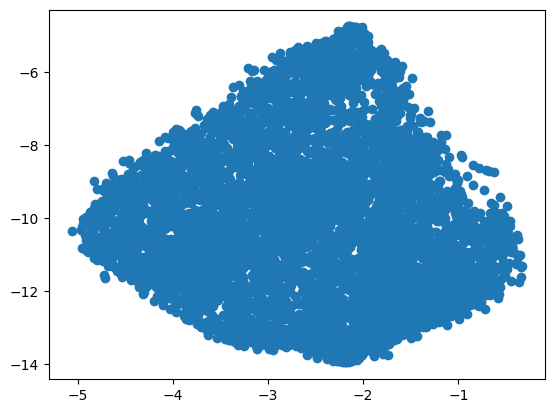

In [12]:
plt.scatter(u[:,0], u[:,1])

In [13]:
# try computing the hamming between all pairs of rows and then making a matrix of that
# then do a PCA on that matrix
symptom_matrix_np = df.values

# Calculate the co-occurrence matrix
co_occurrence_matrix = np.dot(symptom_matrix_np.T, symptom_matrix_np)

# Convert the co-occurrence matrix back to a pandas DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, columns=df.columns, index=df.columns)

In [14]:
co_occurrence_df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
Symptom_Memory_short,4134.0,2233.0,491.0,785.0,543.0,3330.0,3005.0,2836.0,2150.0,892.0,...,1535.0,1188.0,588.0,556.0,459.0,265.0,120.0,3808.0,4105.0,949.0
Symptom_Memory_long,2233.0,2506.0,434.0,596.0,339.0,2191.0,2028.0,1951.0,1498.0,618.0,...,1028.0,820.0,376.0,382.0,312.0,184.0,84.0,2350.0,2493.0,651.0
Symptom_Memory_no_new_memories,491.0,434.0,528.0,210.0,87.0,500.0,480.0,464.0,368.0,180.0,...,230.0,211.0,99.0,114.0,94.0,38.0,22.0,496.0,524.0,174.0
Symptom_Memory_forget_tasks,785.0,596.0,210.0,832.0,141.0,755.0,741.0,708.0,547.0,246.0,...,399.0,327.0,176.0,181.0,139.0,69.0,41.0,799.0,827.0,266.0
Symptom_Memory_other,543.0,339.0,87.0,141.0,725.0,552.0,500.0,460.0,367.0,148.0,...,266.0,213.0,108.0,107.0,74.0,63.0,26.0,663.0,719.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Symptom_SkinAllergy_other_itchy,265.0,184.0,38.0,69.0,63.0,248.0,226.0,201.0,155.0,76.0,...,194.0,155.0,84.0,76.0,76.0,346.0,12.0,308.0,343.0,118.0
Symptom_SkinAllergy_shingles,120.0,84.0,22.0,41.0,26.0,113.0,96.0,90.0,88.0,29.0,...,80.0,57.0,30.0,35.0,21.0,12.0,155.0,143.0,152.0,49.0
Symptom_PEM,3808.0,2350.0,496.0,799.0,663.0,3744.0,3331.0,3148.0,2421.0,960.0,...,1770.0,1383.0,702.0,620.0,549.0,308.0,143.0,5333.0,5278.0,1172.0
Symptom_Fatigue,4105.0,2493.0,524.0,827.0,719.0,4005.0,3537.0,3346.0,2581.0,1039.0,...,1905.0,1470.0,741.0,649.0,574.0,343.0,152.0,5278.0,5911.0,1237.0


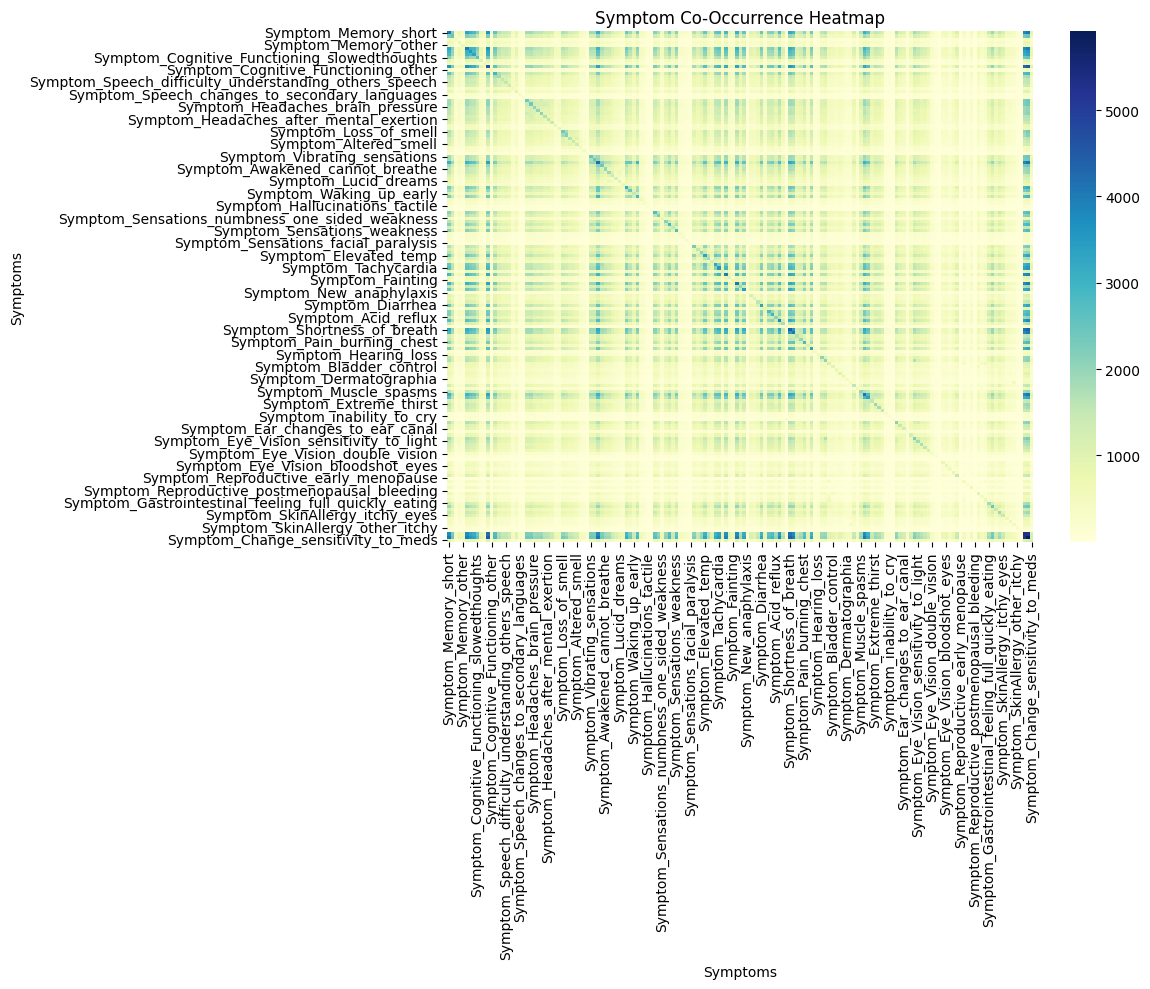

In [15]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(co_occurrence_df, cmap="YlGnBu", annot=False)  # cmap sets the color map

plt.title("Symptom Co-Occurrence Heatmap")
plt.xlabel("Symptoms")
plt.ylabel("Symptoms")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_33379/1613461464.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='average')


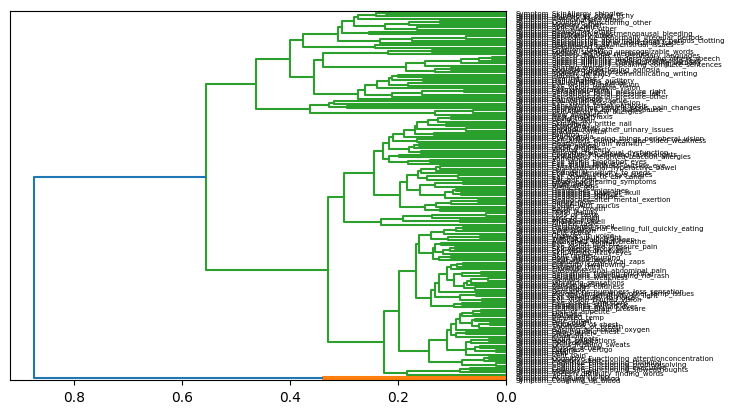

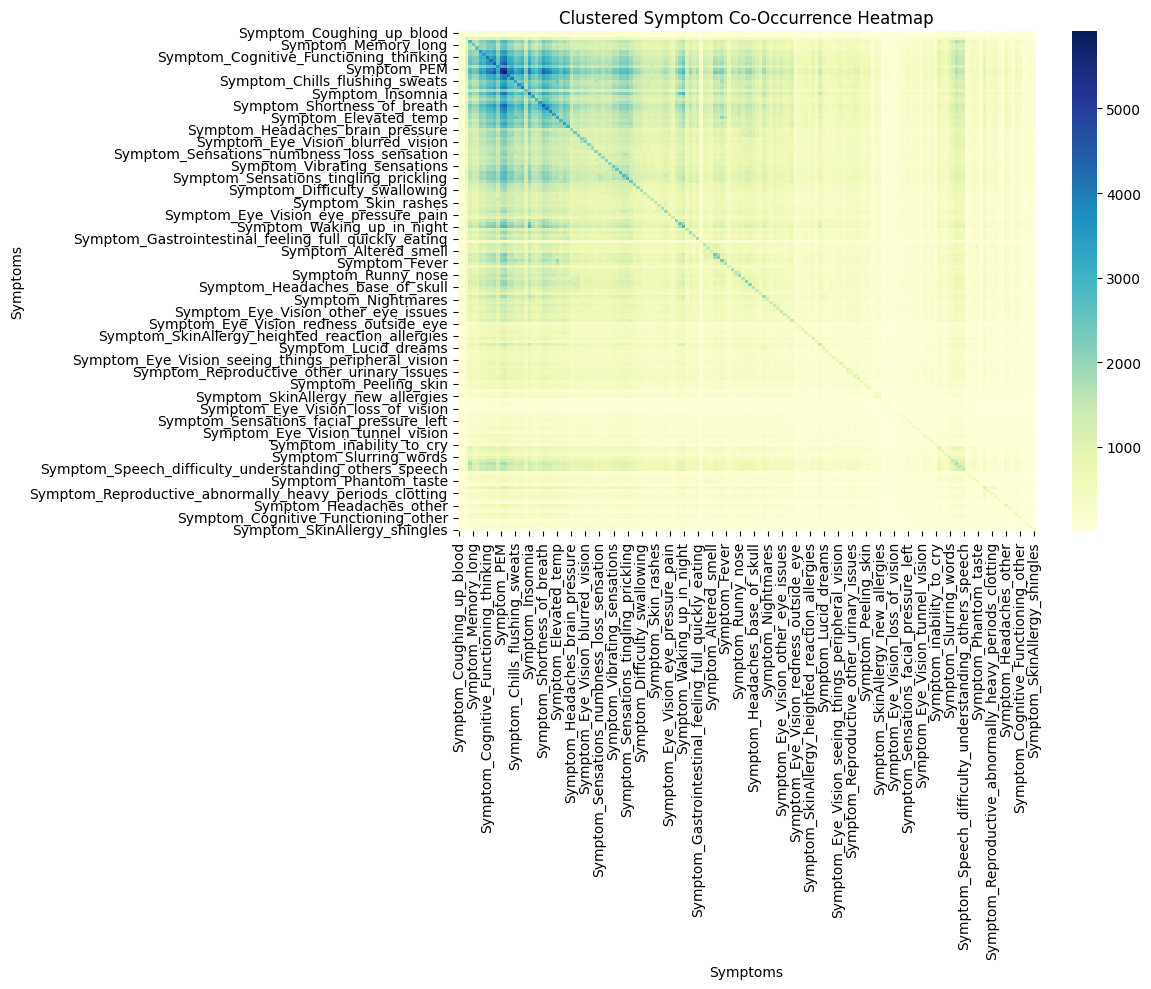

In [16]:

# Calculate the distance matrix for clustering
distance_matrix = 1 - co_occurrence_df.corr()  # Using correlation-based distance

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='average')

# Define the order of rows and columns based on clustering
dendro_row = hierarchy.dendrogram(linkage_matrix, labels=co_occurrence_df.index, orientation='left')
order = dendro_row['leaves']
clustered_co_occurrence_df = co_occurrence_df.iloc[order, order]

# Create a clustered heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(clustered_co_occurrence_df, cmap="YlGnBu", annot=False)

plt.title("Clustered Symptom Co-Occurrence Heatmap")
plt.xlabel("Symptoms")
plt.ylabel("Symptoms")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [17]:
# Extract the cluster assignments
clusters = hierarchy.fcluster(linkage_matrix, t=10, criterion='maxclust')  # Adjust 't' as needed


In [19]:
clustered_co_occurrence_df.index[clusters == 4].values

array(['Symptom_Headaches_base_of_skull', 'Symptom_Bulging_veins',
       'Symptom_Memory_other'], dtype=object)

In [74]:
clustered_co_occurrence_df.index[clusters == 5].values

array(['Symptom_Gastrointestinal_feeling_full_quickly_eating',
       'Symptom_Memory_forget_tasks',
       'Symptom_Speech_difficulty_understanding_others_speech',
       'Symptom_Memory_no_new_memories'], dtype=object)

In [75]:
clustered_co_occurrence_df.index[clusters == 6].values

array(['Symptom_Heat_intolerance', 'Symptom_Bone_ache_burning',
       'Symptom_Skin_rashes', 'Symptom_Changes_in_voice',
       'Symptom_Acid_reflux', 'Symptom_Constipation',
       'Symptom_Lucid_dreams',
       'Symptom_Reproductive_other_urinary_issues',
       'Symptom_Eye_Vision_loss_of_vision',
       'Symptom_Sensations_facial_pressure_right',
       'Symptom_inability_to_cry',
       'Symptom_Speech_difficulty_communicating_writing'], dtype=object)

In [76]:
clustered_co_occurrence_df.index[clusters == 7].values

array(['Symptom_Speech_difficulty_finding_words',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Dizziness_vertigo', 'Symptom_Muscle_aches',
       'Symptom_Chills_flushing_sweats', 'Symptom_Tachycardia',
       'Symptom_Night_sweats', 'Symptom_Restless_leg'], dtype=object)

In [77]:
clustered_co_occurrence_df.index[clusters == 8].values

array(['Symptom_Acute_confusion', 'Symptom_Heart_palpitations',
       'Symptom_Insomnia'], dtype=object)

In [78]:
clustered_co_occurrence_df.index[clusters == 9].values

array(['Symptom_Ear_sensitivity_to_noise',
       'Symptom_Merged_temperature_other_temp_issues'], dtype=object)

In [79]:
clustered_co_occurrence_df.index[clusters == 10].values

array(['Symptom_Memory_long', 'Symptom_PEM', 'Symptom_Sleep_other',
       'Symptom_Diarrhea', 'Symptom_SkinAllergy_itchy_eyes',
       'Symptom_Waking_up_early',
       'Symptom_Sensations_numbness_one_sided_weakness',
       'Symptom_SkinAllergy_brittle_nail',
       'Symptom_Sensations_facial_paralysis',
       'Symptom_Speech_changes_to_secondary_languages',
       'Symptom_Phantom_taste',
       'Symptom_Reproductive_all_menstrual_issues',
       'Symptom_Reproductive_other_menstrual_issues',
       'Symptom_Cognitive_Functioning_other',
       'Symptom_Hallucinations_other'], dtype=object)

In [80]:
clustered_co_occurrence_df.index[clusters == 1].values

array(['Symptom_Gastrointestinal_hyperactive_bowel'], dtype=object)

In [81]:
clustered_co_occurrence_df.index[clusters == 2].values

array(['Symptom_Hallucinations_tactile'], dtype=object)

In [83]:
len(clustered_co_occurrence_df.index[clusters == 3].values)

116

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_61337/695356942.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


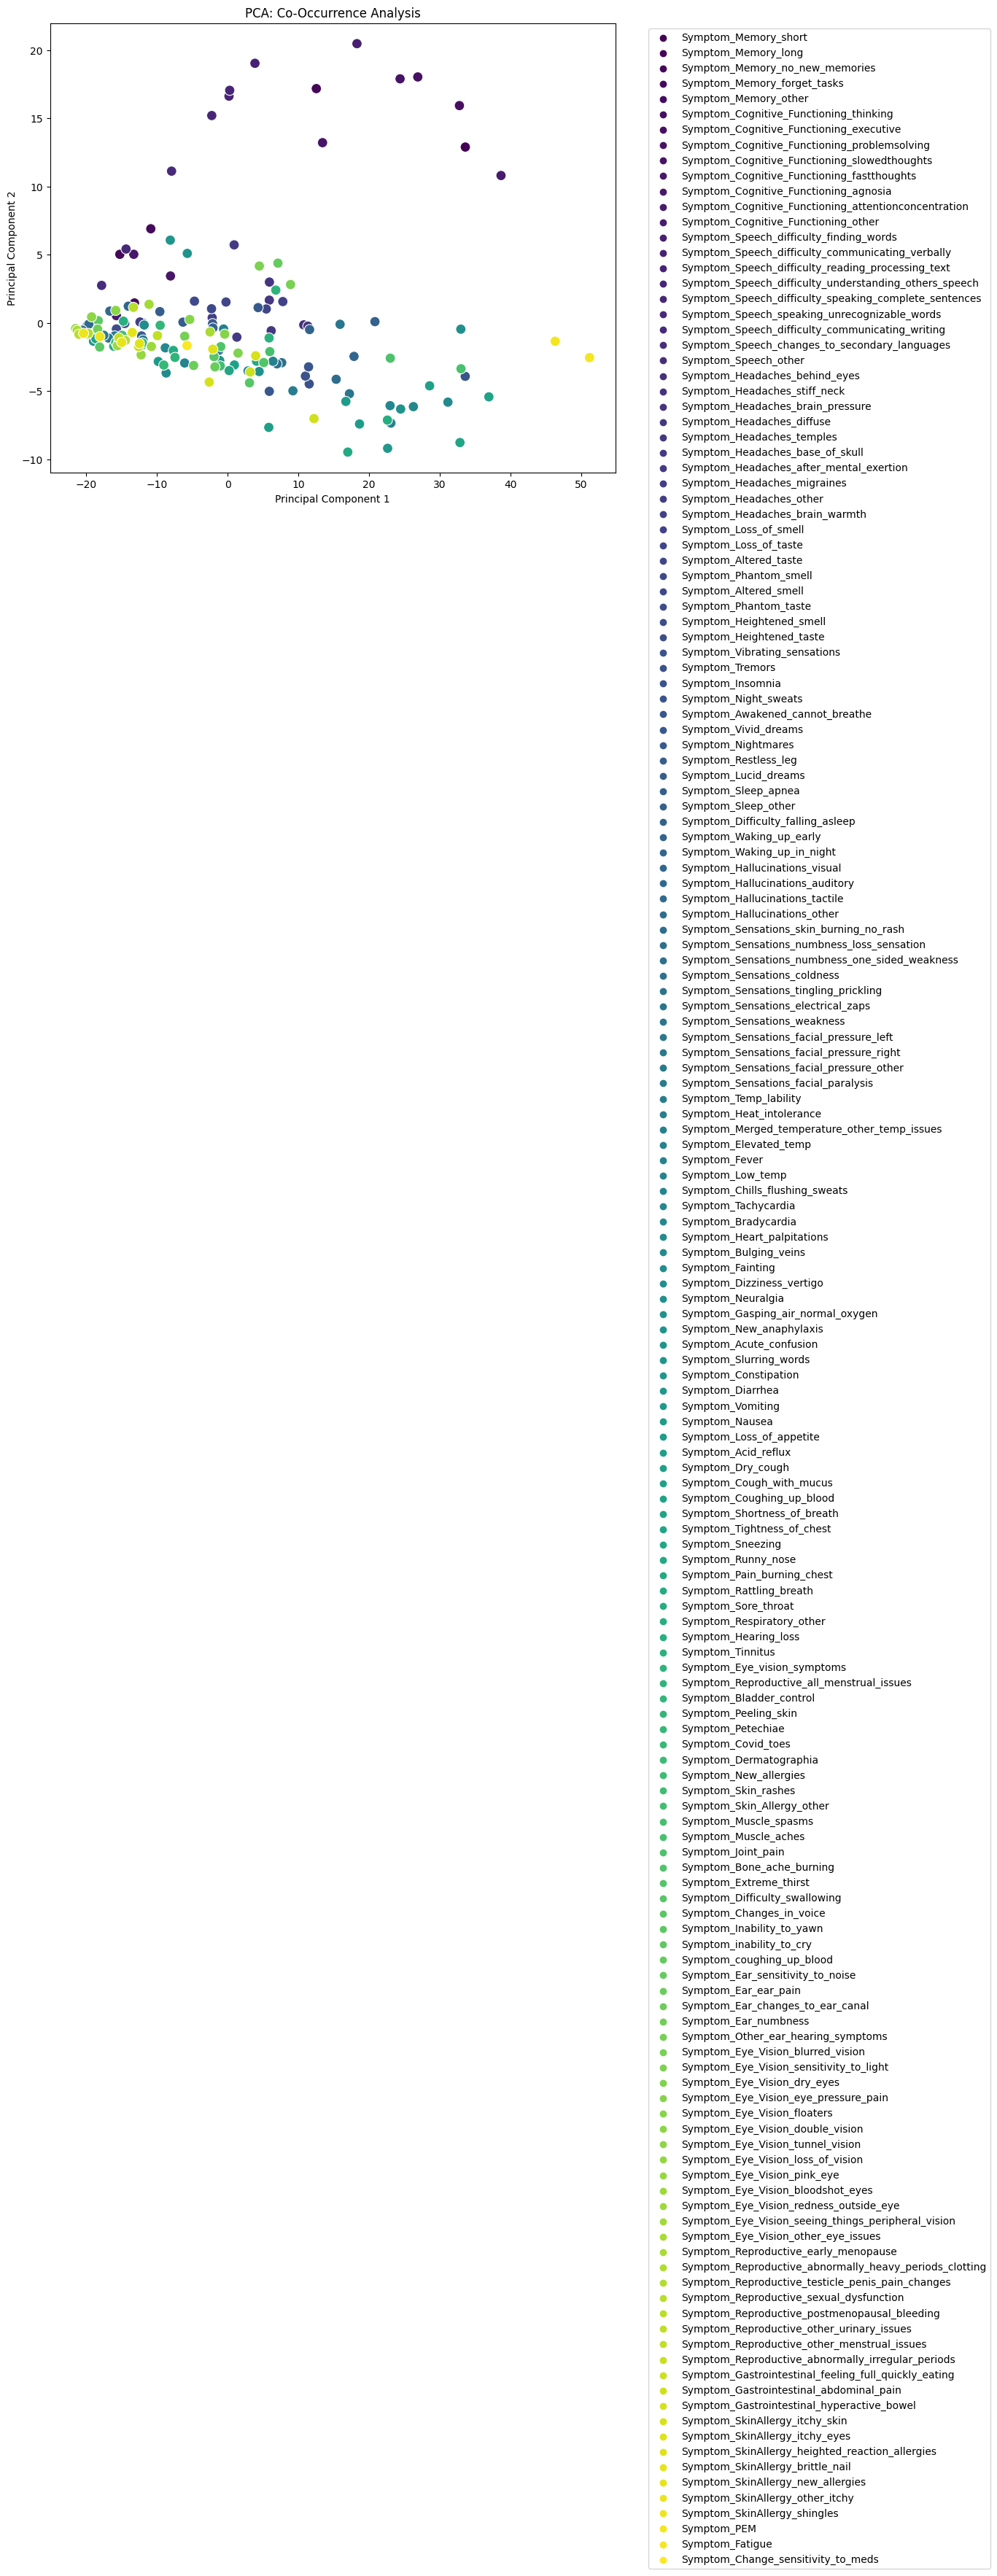

In [89]:
symptom_matrix_np = df.T.values

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(symptom_matrix_np)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Assuming you already have the 'co_occurrence_df' DataFrame from earlier
# Add the symptom names to the PCA DataFrame
pca_df['Symptom'] = co_occurrence_df.index

# Create a scatter plot of the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Symptom', palette='viridis', s=100)

plt.title("PCA: Co-Occurrence Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





In [18]:
df.sum(axis=0)["Symptom_SkinAllergy_shingles"]

155.0

In [19]:
df.sum(axis=0)["Symptom_Memory_short"]

4134.0

In [23]:
# okayy so this is the number of co-occurrences for each symptom pair, I think?

df.T.dot(df)

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
Symptom_Memory_short,4134.0,2233.0,491.0,785.0,543.0,3330.0,3005.0,2836.0,2150.0,892.0,...,1535.0,1188.0,588.0,556.0,459.0,265.0,120.0,3808.0,4105.0,949.0
Symptom_Memory_long,2233.0,2506.0,434.0,596.0,339.0,2191.0,2028.0,1951.0,1498.0,618.0,...,1028.0,820.0,376.0,382.0,312.0,184.0,84.0,2350.0,2493.0,651.0
Symptom_Memory_no_new_memories,491.0,434.0,528.0,210.0,87.0,500.0,480.0,464.0,368.0,180.0,...,230.0,211.0,99.0,114.0,94.0,38.0,22.0,496.0,524.0,174.0
Symptom_Memory_forget_tasks,785.0,596.0,210.0,832.0,141.0,755.0,741.0,708.0,547.0,246.0,...,399.0,327.0,176.0,181.0,139.0,69.0,41.0,799.0,827.0,266.0
Symptom_Memory_other,543.0,339.0,87.0,141.0,725.0,552.0,500.0,460.0,367.0,148.0,...,266.0,213.0,108.0,107.0,74.0,63.0,26.0,663.0,719.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Symptom_SkinAllergy_other_itchy,265.0,184.0,38.0,69.0,63.0,248.0,226.0,201.0,155.0,76.0,...,194.0,155.0,84.0,76.0,76.0,346.0,12.0,308.0,343.0,118.0
Symptom_SkinAllergy_shingles,120.0,84.0,22.0,41.0,26.0,113.0,96.0,90.0,88.0,29.0,...,80.0,57.0,30.0,35.0,21.0,12.0,155.0,143.0,152.0,49.0
Symptom_PEM,3808.0,2350.0,496.0,799.0,663.0,3744.0,3331.0,3148.0,2421.0,960.0,...,1770.0,1383.0,702.0,620.0,549.0,308.0,143.0,5333.0,5278.0,1172.0
Symptom_Fatigue,4105.0,2493.0,524.0,827.0,719.0,4005.0,3537.0,3346.0,2581.0,1039.0,...,1905.0,1470.0,741.0,649.0,574.0,343.0,152.0,5278.0,5911.0,1237.0


In [31]:
co_occurrence_df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
Symptom_Memory_short,4134.0,2233.0,491.0,785.0,543.0,3330.0,3005.0,2836.0,2150.0,892.0,...,1535.0,1188.0,588.0,556.0,459.0,265.0,120.0,3808.0,4105.0,949.0
Symptom_Memory_long,2233.0,2506.0,434.0,596.0,339.0,2191.0,2028.0,1951.0,1498.0,618.0,...,1028.0,820.0,376.0,382.0,312.0,184.0,84.0,2350.0,2493.0,651.0
Symptom_Memory_no_new_memories,491.0,434.0,528.0,210.0,87.0,500.0,480.0,464.0,368.0,180.0,...,230.0,211.0,99.0,114.0,94.0,38.0,22.0,496.0,524.0,174.0
Symptom_Memory_forget_tasks,785.0,596.0,210.0,832.0,141.0,755.0,741.0,708.0,547.0,246.0,...,399.0,327.0,176.0,181.0,139.0,69.0,41.0,799.0,827.0,266.0
Symptom_Memory_other,543.0,339.0,87.0,141.0,725.0,552.0,500.0,460.0,367.0,148.0,...,266.0,213.0,108.0,107.0,74.0,63.0,26.0,663.0,719.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Symptom_SkinAllergy_other_itchy,265.0,184.0,38.0,69.0,63.0,248.0,226.0,201.0,155.0,76.0,...,194.0,155.0,84.0,76.0,76.0,346.0,12.0,308.0,343.0,118.0
Symptom_SkinAllergy_shingles,120.0,84.0,22.0,41.0,26.0,113.0,96.0,90.0,88.0,29.0,...,80.0,57.0,30.0,35.0,21.0,12.0,155.0,143.0,152.0,49.0
Symptom_PEM,3808.0,2350.0,496.0,799.0,663.0,3744.0,3331.0,3148.0,2421.0,960.0,...,1770.0,1383.0,702.0,620.0,549.0,308.0,143.0,5333.0,5278.0,1172.0
Symptom_Fatigue,4105.0,2493.0,524.0,827.0,719.0,4005.0,3537.0,3346.0,2581.0,1039.0,...,1905.0,1470.0,741.0,649.0,574.0,343.0,152.0,5278.0,5911.0,1237.0


In [63]:
#binary_matrix = df.values

# Calculate the Jaccard indices between columns
#num_symptoms = binary_matrix.shape[1]
num_symptoms = df.shape[1]
jaccard_matrix = np.zeros((num_symptoms, num_symptoms))

for i in range(num_symptoms):
    for j in range(i + 1, num_symptoms):
        intersection = np.dot(df.iloc[:,i].values, df.iloc[:,j].values)
        union = df.iloc[:,i].sum()+df.iloc[:,j].sum()-np.dot(df.iloc[:,i].values, df.iloc[:,j].values)
        jaccard_index = intersection / union
        jaccard_matrix[i, j] = jaccard_index
        jaccard_matrix[j, i] = jaccard_index  # Symmetric

# Convert the Jaccard matrix to a DataFrame for better visualization
jaccard_df = pd.DataFrame(jaccard_matrix, index=df.columns, columns=df.columns)

print(jaccard_df)

                                    Symptom_Memory_short  Symptom_Memory_long  \
Symptom_Memory_short                            0.000000             0.506694   
Symptom_Memory_long                             0.506694             0.000000   
Symptom_Memory_no_new_memories                  0.117718             0.166923   
Symptom_Memory_forget_tasks                     0.187754             0.217360   
Symptom_Memory_other                            0.125811             0.117220   
...                                                  ...                  ...   
Symptom_SkinAllergy_other_itchy                 0.062871             0.068966   
Symptom_SkinAllergy_shingles                    0.028784             0.032596   
Symptom_PEM                                     0.672910             0.428129   
Symptom_Fatigue                                 0.691077             0.420831   
Symptom_Change_sensitivity_to_meds              0.213498             0.208989   

                           

In [70]:

n = 10  # Number of largest entries to retrieve

# Get the n largest entries from the DataFrame
largest_entries = jaccard_df.unstack().nlargest(n)


In [71]:
largest_entries

Symptom_PEM                                           Symptom_Fatigue                                         0.884680
Symptom_Fatigue                                       Symptom_PEM                                             0.884680
Symptom_Cognitive_Functioning_attentionconcentration  Symptom_Fatigue                                         0.760397
Symptom_Fatigue                                       Symptom_Cognitive_Functioning_attentionconcentration    0.760397
Symptom_Cognitive_Functioning_thinking                Symptom_Cognitive_Functioning_attentionconcentration    0.745973
Symptom_Cognitive_Functioning_attentionconcentration  Symptom_Cognitive_Functioning_thinking                  0.745973
                                                      Symptom_PEM                                             0.738602
Symptom_PEM                                           Symptom_Cognitive_Functioning_attentionconcentration    0.738602
Symptom_Shortness_of_breath                     

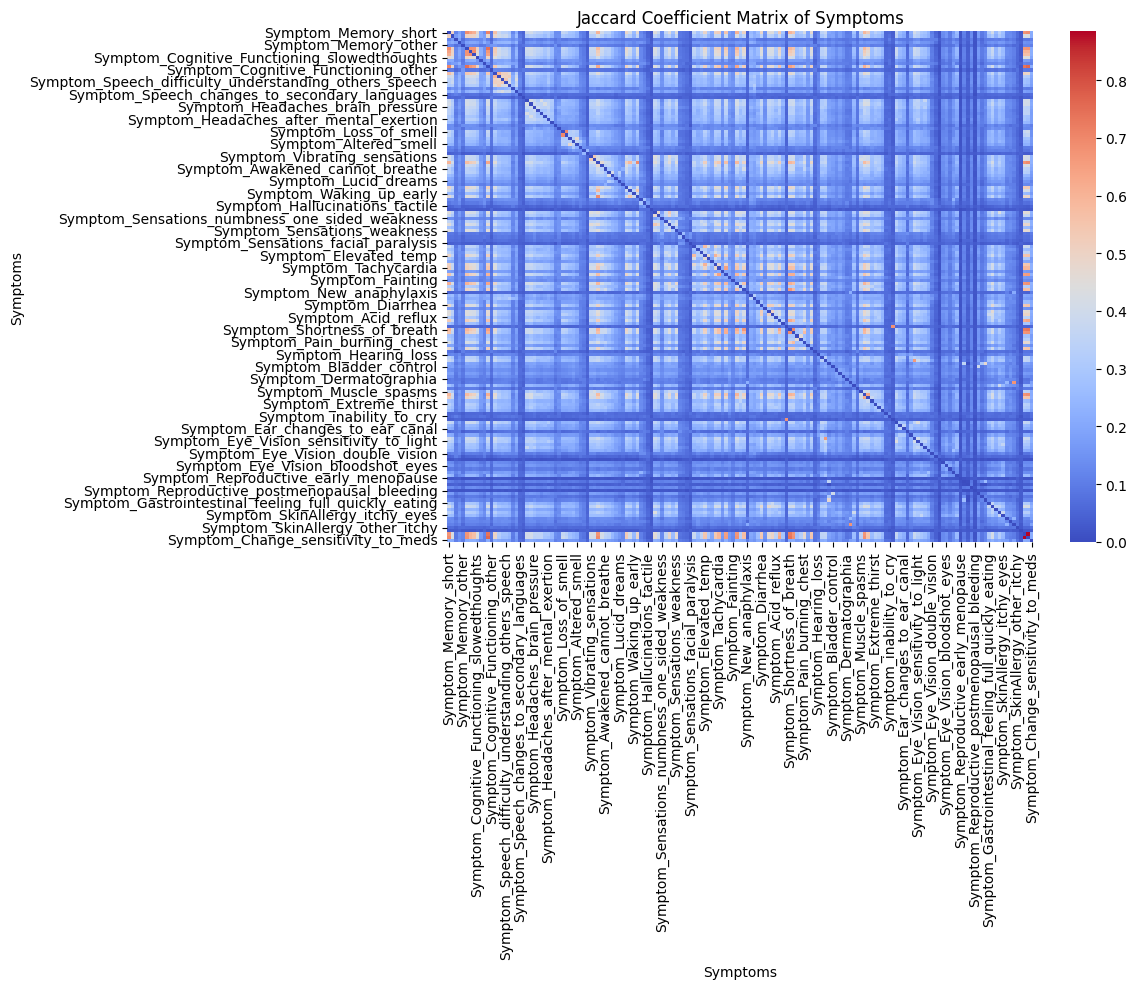

In [72]:

# Create a heatmap of the Jaccard coefficient matrix
plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_df, cmap="coolwarm", annot=False)

plt.title("Jaccard Coefficient Matrix of Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("Symptoms")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_62691/2909557401.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(jaccard_df, method='average')


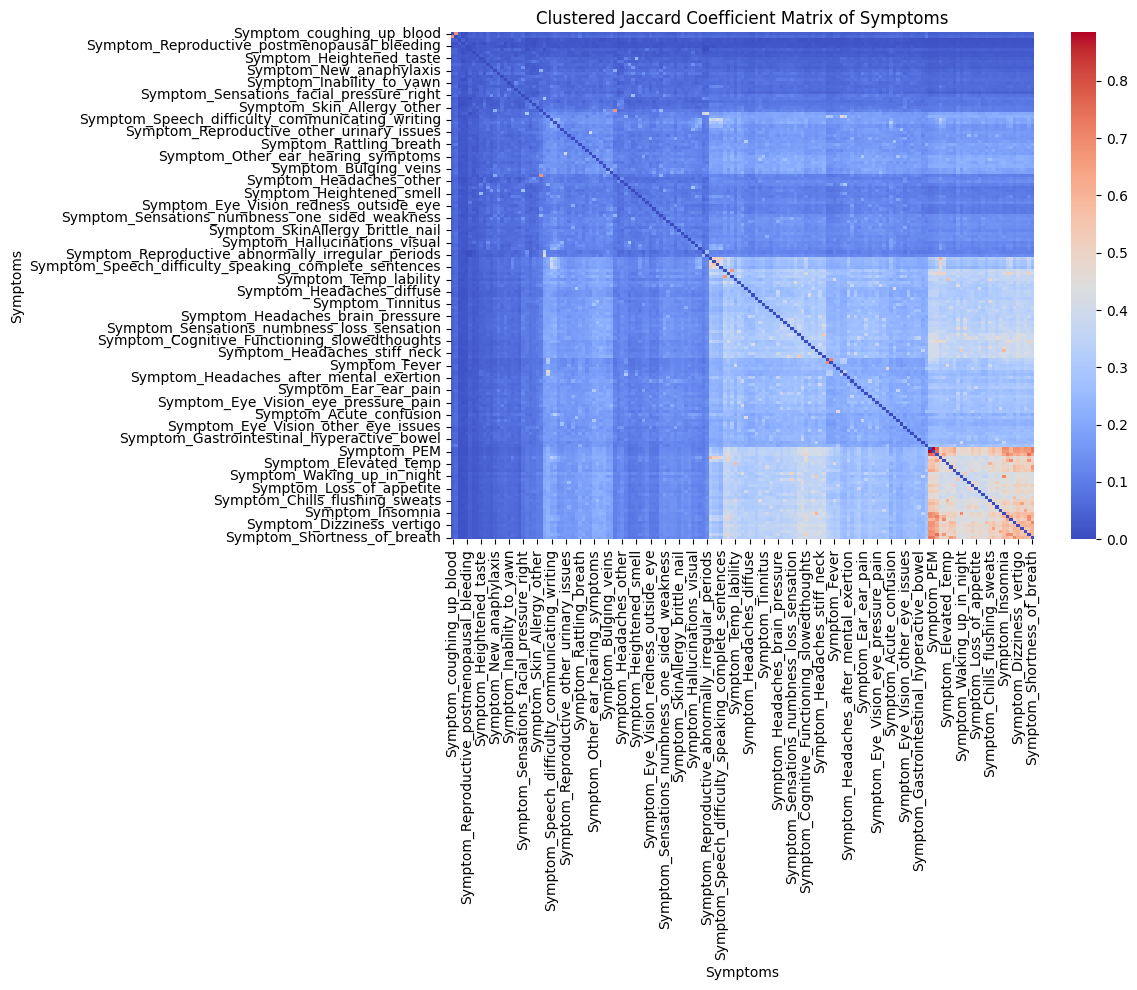

In [44]:
linkage_matrix = hierarchy.linkage(jaccard_df, method='average')

# Create a clustered heatmap of the Jaccard coefficient matrix
order = hierarchy.dendrogram(linkage_matrix, no_plot=True)['leaves']
jaccard_matrix_clustered = jaccard_df.iloc[order, order]

plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_matrix_clustered, cmap="coolwarm", annot=False)

plt.title("Clustered Jaccard Coefficient Matrix of Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("Symptoms")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [61]:
jaccard_values = jaccard_df.values[np.triu_indices_from(jaccard_df, k=1)]

# Get the indices of the ten largest values
n_top = 20
top_indices = np.argpartition(jaccard_values, -n_top)[-n_top:]

# Convert the flattened index back to row and column indices
num_symptoms = jaccard_df.shape[0]
row_indices, col_indices = np.unravel_index(top_indices, (num_symptoms, num_symptoms))

# Print the indices and corresponding Jaccard values
for i in range(len(top_indices)):
    print(f"Symptom 1: {jaccard_df.index[row_indices[i]]}, "
          f"Symptom 2: {jaccard_df.columns[col_indices[i]]}, "
          f"Jaccard Value: {jaccard_values[top_indices[i]]}")

Symptom 1: Symptom_Cognitive_Functioning_thinking, Symptom 2: Symptom_Eye_Vision_seeing_things_peripheral_vision, Jaccard Value: 0.6758353020587242
Symptom 1: Symptom_Memory_other, Symptom 2: Symptom_Reproductive_other_menstrual_issues, Jaccard Value: 0.6774479397430218
Symptom 1: Symptom_Memory_short, Symptom 2: Symptom_PEM, Jaccard Value: 0.6910774410774411
Symptom 1: Symptom_Phantom_taste, Symptom 2: Symptom_Insomnia, Jaccard Value: 0.6947615849563465
Symptom 1: Symptom_Sensations_coldness, Symptom 2: Symptom_Sensations_numbness_one_sided_weakness, Jaccard Value: 0.679286555611644
Symptom 1: Symptom_Memory_short, Symptom 2: Symptom_Memory_other, Jaccard Value: 0.6902985074626866
Symptom 1: Symptom_Sensations_facial_pressure_other, Symptom 2: Symptom_Vomiting, Jaccard Value: 0.6782006920415224
Symptom 1: Symptom_Chills_flushing_sweats, Symptom 2: Symptom_Elevated_temp, Jaccard Value: 0.6855843718423712
Symptom 1: Symptom_Sensations_facial_paralysis, Symptom 2: Symptom_Tightness_of_ch

In [55]:
face_para = df["Symptom_Sensations_facial_paralysis"]

In [56]:
mig = df["Symptom_Headaches_migraines"]

In [60]:
np.dot(face_para.values, mig.values)/(face_para.sum()+mig.sum()-np.dot(face_para.values, mig.values))

0.048284625158831